https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac
1. Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)
2. Feed it a word and train it to predict its neighbouring word.
3. Remove the last (output layer) and keep the input and hidden layer.
4. Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.

In [1]:
import numpy as np
import tensorflow as tf

corpus_raw = 'He is the king . The king is royal . She is the royal queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

In [2]:
# we will create a dictionary which translates words to integers and 
#integers to words. This will come in handy later.

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [4]:
# we want a list of our sentences as a list of words
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [5]:
#we will generate our training data
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [6]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [7]:
print(x_train)

[[ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0

In [8]:
print(x_train.shape, y_train.shape)
# meaning 34 training points, where each point has 7 dimensions

(34, 7) (34, 7)


In [9]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [10]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [ ]:
#Train it
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

In [12]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.18480085 -0.68122405  0.4209334   0.53533238 -2.92137933]
 [ 2.18933177 -0.2100862  -1.00468767 -1.55379403  0.78607732]
 [ 3.14121079 -1.70305455 -1.14354444  0.09722504 -2.45567489]
 [-2.68395877 -1.44073045 -0.01166853 -0.81541163 -0.22520046]
 [ 1.74635375  0.76744473  0.45849663 -0.06424507  1.98781753]
 [-1.21357548  0.37077275  1.33805311  1.9249531   0.92914242]
 [ 0.61518353 -2.0206058  -0.9653368   1.07144928 -1.06109512]]
----------
[ 0.23307824 -0.76912606  1.15647137  1.43982542 -0.14034578]
----------


In [15]:
vectors = sess.run(W1 + b1)
# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)

[[  4.82773930e-02  -1.45035005e+00   1.57740474e+00   1.97515774e+00
   -3.06172514e+00]
 [  2.42241001e+00  -9.79212284e-01   1.51783705e-01  -1.13968611e-01
    6.45731568e-01]
 [  3.37428904e+00  -2.47218060e+00   1.29269361e-02   1.53705049e+00
   -2.59602070e+00]
 [ -2.45088053e+00  -2.20985651e+00   1.14480281e+00   6.24413788e-01
   -3.65546227e-01]
 [  1.97943199e+00  -1.68132782e-03   1.61496806e+00   1.37558031e+00
    1.84747171e+00]
 [ -9.80497241e-01  -3.98353308e-01   2.49452448e+00   3.36477852e+00
    7.88796663e-01]
 [  8.48261774e-01  -2.78973198e+00   1.91134572e-01   2.51127481e+00
   -1.20144093e+00]]


In [16]:
#Here’s a quick function to find the closest vector to a given vector. Beware, it’s a dirty implementation.
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [17]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
he


In [18]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

royal -0.343097
king -0.362922
she -0.47934
the -0.619507
queen -0.000488798
is -0.0907068
he -0.691226


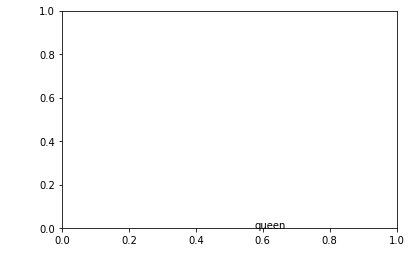

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()